In [1]:
# Import dependencies
import pandas as pd
from matplotlib import pyplot

In [2]:
# Read file
xls=pd.ExcelFile("../resource/data.xlsx")
df1 = pd.read_excel(xls, 'Price')
df2 = pd.read_excel(xls, 'Location')

In [3]:
# Change the column name
df1_=df1.rename(columns={'LOCATION_ID':'ID'})

In [4]:
# left Join df1_ and df2
df_new=pd.merge(df1_,df2,on='ID',how='left')
print(df_new.shape)

# Represent the first five rows of new table
df_new.head()

(3927, 6)


,ID,YEAR,INTERNET_PRICE,CITY,REGION,COUNTRY
0,36333877,2020,109.553333,Anchorage,Alaska,United States
1,97066708,2020,109.223301,Male,Kaafu Atoll,Maldives
2,86180405,2020,104.833333,Harare,NaN,Zimbabwe
3,93339430,2020,101.023925,Abu Dhabi,Emirate of Abu Dhabi,United Arab Emirates
4,26718520,2020,99.333333,Santa Rosa,California,United States


In [5]:
# Summary Statistic for INTERNET_Price column
df_new.describe().INTERNET_PRICE

count    3927.000000
mean       39.996615
std        27.179158
min         1.866995
25%        23.121728
50%        37.403907
75%        54.163430
max       962.189981
Name: INTERNET_PRICE, dtype: float64

In [6]:
# Information about DataFrame
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3927 entries, 0 to 3926
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              3927 non-null   int64  
 1   YEAR            3927 non-null   int64  
 2   INTERNET_PRICE  3927 non-null   float64
 3   CITY            3927 non-null   object 
 4   REGION          3270 non-null   object 
 5   COUNTRY         3927 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 214.8+ KB


In [7]:
# Determine if we have duplication in the dataset
df_new.duplicated().sum()

0

In [8]:
# Find outliers 
Q1 = df_new.INTERNET_PRICE.quantile(0.25)
Q3 = df_new.INTERNET_PRICE.quantile(0.75)
IQR = Q3 - Q1
lowerbound = Q1-(1.5 * IQR)
upperbound = Q3 + (1.5 * IQR)
df_outlier=df_new[(df_new.INTERNET_PRICE < lowerbound) | (df_new.INTERNET_PRICE > upperbound)]
df_outlier.shape

(35, 6)

In [9]:
# Eliminate outliers
df_new.drop(df_new[(df_new.INTERNET_PRICE > upperbound)|(df_new.INTERNET_PRICE<lowerbound) ].index , inplace=True)
df_new.shape

(3892, 6)

Text(0, 0.5, 'Internet Price')

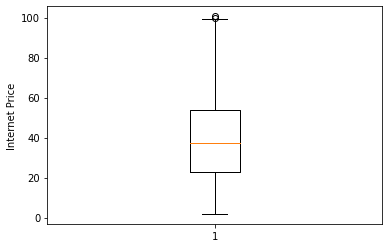

In [10]:
# Box plot for Internet_price column
data=df_new.INTERNET_PRICE
fig = pyplot.figure()
ax = fig.add_subplot()
pyplot.boxplot(data)
ax.set_ylabel('Internet Price')

In [11]:
# Number of city, Country, region after eliminating outliers
print(f"Number of City: {df_new['CITY'].nunique()}")
print(f"Number of Country: {df_new['COUNTRY'].nunique()}")
print(f"Number of Region: {df_new['REGION'].nunique()}")
print(f"Number of Year: {df_new['YEAR'].nunique()}")

Number of City: 673
Number of Country: 118
Number of Region: 348
Number of Year: 11


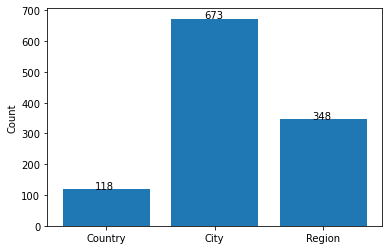

In [14]:
# Represent Country, City, and Region by barchart
X = ['Country','City', 'Region']
Y = [df_new['COUNTRY'].nunique(),df_new['CITY'].nunique(),df_new['REGION'].nunique()]
pyplot.bar(X,Y)
pyplot.ylabel('Count')
# pyplot.show()

# Add number above 
xlocs, xlabs = pyplot.xticks()
for i, v in enumerate(Y):
    pyplot.text(xlocs[i] - 0.1, v + 0.03, str(v))

In [15]:
# Export new merged table after preprocessing 
df_new.to_excel('df_new.xlsx')

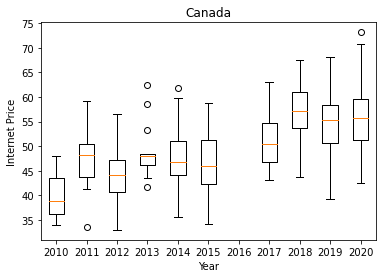

In [12]:
#  Range of Internet price in Canada during 2010-2025
# Create a new DataFrame for Canada
df_new5=df_new[(df_new['COUNTRY']=='Canada')]
df_new5

# Sort the new DATAFRAME based on year
df_new6=df_new5.sort_values(by=['YEAR'])

# Create boxplot
price_2010=df_new6[df_new6['YEAR']==2010]['INTERNET_PRICE']
price_2011=df_new6[df_new6['YEAR']==2011]['INTERNET_PRICE']
price_2012=df_new6[df_new6['YEAR']==2012]['INTERNET_PRICE']
price_2013=df_new6[df_new6['YEAR']==2013]['INTERNET_PRICE']
price_2014=df_new6[df_new6['YEAR']==2014]['INTERNET_PRICE']
price_2015=df_new6[df_new6['YEAR']==2015]['INTERNET_PRICE']
price_2016=df_new6[df_new6['YEAR']==2016]['INTERNET_PRICE']
price_2017=df_new6[df_new6['YEAR']==2017]['INTERNET_PRICE']
price_2018=df_new6[df_new6['YEAR']==2018]['INTERNET_PRICE']
price_2019=df_new6[df_new6['YEAR']==2019]['INTERNET_PRICE']
price_2020=df_new6[df_new6['YEAR']==2020]['INTERNET_PRICE']

box_plot_data=[price_2010,price_2011,price_2012,price_2013,price_2014,price_2015,price_2016,price_2017,price_2018,price_2019,price_2020]

fig = pyplot.figure()
ax = fig.add_subplot()
ax.set_ylabel('Internet Price')
ax.set_xlabel('Year')
ax.set_title('Canada')
pyplot.boxplot(box_plot_data,labels=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
pyplot.show()

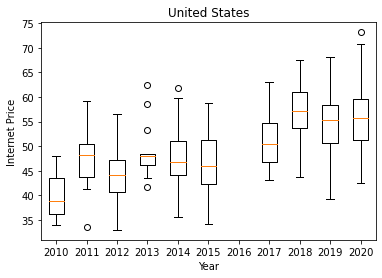

In [13]:
# Create a new DataFrame for United States
df_new7=df_new6[(df_new6['COUNTRY']=='United States')]

# Sort the new DATAFRAME based on year
df_new7=df_new6.sort_values(by=['YEAR'])

# Create BoxPlot
price_2010=df_new7[df_new7['YEAR']==2010]['INTERNET_PRICE']
price_2011=df_new7[df_new7['YEAR']==2011]['INTERNET_PRICE']
price_2012=df_new7[df_new7['YEAR']==2012]['INTERNET_PRICE']
price_2013=df_new7[df_new7['YEAR']==2013]['INTERNET_PRICE']
price_2014=df_new7[df_new7['YEAR']==2014]['INTERNET_PRICE']
price_2015=df_new7[df_new7['YEAR']==2015]['INTERNET_PRICE']
price_2016=df_new7[df_new7['YEAR']==2016]['INTERNET_PRICE']
price_2017=df_new7[df_new7['YEAR']==2017]['INTERNET_PRICE']
price_2018=df_new7[df_new7['YEAR']==2018]['INTERNET_PRICE']
price_2019=df_new7[df_new7['YEAR']==2019]['INTERNET_PRICE']
price_2020=df_new7[df_new7['YEAR']==2020]['INTERNET_PRICE']

box_plot_data=[price_2010,price_2011,price_2012,price_2013,price_2014,price_2015,price_2016,price_2017,price_2018,price_2019,price_2020]


fig = pyplot.figure()
ax = fig.add_subplot()
ax.set_ylabel('Internet Price')
ax.set_xlabel('Year')
ax.set_title('United States')
pyplot.boxplot(box_plot_data,labels=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
pyplot.show()